In [1]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TChain, TCut, TF1, TH1F, TH2F, TCutG, TText, TLatex, TLine,TVirtualFitter
from ROOT import gBenchmark, gStyle, gROOT

In [2]:
import rootnotes
from numpy import *
import scipy
import pylab
import matplotlib.pyplot as plt # plotting libraries from matlab
from scipy.stats import multivariate_normal
from dateutil import parser
from matplotlib import pyplot as plt
import matplotlib.dates as md
import scipy.io as sio

In [3]:
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')
import aLib

In [5]:
g1=0.1167
g2=12.05

g1DD=g1*0.982
g2DD=g2*0.954

<h1> 2D Normal fitting  </h1>

In [6]:
import scipy.optimize as opt
import numpy as np

def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

<h1> Fit exponential decay </h1>

In [7]:
from scipy.optimize import curve_fit
from __future__ import division

def func(x, a, c):
    return a*np.exp(-x/c)

<h1> Load in all the LUX Run03 WIMP Search Data </h1>

In [8]:
chain5 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain4 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain3 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain2 = TChain('golden')
chain2.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

9

<h1> Define the S1 and S2 cuts to seperate the islands of energy (see later plots) </h1>

In [9]:
Energies=[33.2]
NamesE=["33.2 keV"]
cutsE=array([[29.5, 36]])


mean_s2=zeros(len(Energies))
mean_s2_sig=zeros(len(Energies))
mean_s1=zeros(len(Energies))
mean_s1_sig=zeros(len(Energies))

<h1> Make a cut after 24 hours of each Kr83 calibration </h1>

In [10]:
Kr_files=array([['lux10_20130422T2031'],
       ['lux10_20130424T1406'],
       ['lux10_20130424T1740'],
       ['lux10_20130425T1047'],
       ['lux10_20130426T0951'],
       ['lux10_20130426T1019'],
       ['lux10_20130429T1433'],
       ['lux10_20130429T1447'],
       ['lux10_20130501T1508'],
       ['lux10_20130503T1457'],
       ['lux10_20130506T1328'],
       ['lux10_20130510T1250'],
       ['lux10_20130510T1607'],
       ['lux10_20130510T2008'],
       ['lux10_20130511T0014'],
       ['lux10_20130513T1438'],
       ['lux10_20130517T1508'],
       ['lux10_20130517T1542'],
       ['lux10_20130517T1810'],
       ['lux10_20130520T1444'],
       ['lux10_20130520T1504'],
       ['lux10_20130520T1742'],
       ['lux10_20130520T1758'],
       ['lux10_20130520T1909'],
       ['lux10_20130524T1503'],
       ['lux10_20130524T1537'],
       ['lux10_20130524T1829'],
       ['lux10_20130528T1304'],
       ['lux10_20130528T1546'],
       ['lux10_20130529T1517'],
       ['lux10_20130529T1547'],
       ['lux10_20130529T2003'],
       ['lux10_20130531T1403'],
       ['lux10_20130531T1421'],
       ['lux10_20130604T1421'],
       ['lux10_20130604T1737'],
       ['lux10_20130604T2137'],
       ['lux10_20130604T2334'],
       ['lux10_20130607T1512'],
       ['lux10_20130610T1518'],
       ['lux10_20130614T1623'],
       ['lux10_20130617T1457'],
       ['lux10_20130621T1533'],
       ['lux10_20130626T1028'],
       ['lux10_20130626T1517'],
       ['lux10_20130628T1444'],
       ['lux10_20130701T1451'],
       ['lux10_20130701T1646'],
       ['lux10_20130701T2257'],
       ['lux10_20130705T1530'],
       ['lux10_20130709T1009'],
       ['lux10_20130709T1811'],
       ['lux10_20130712T1427'],
       ['lux10_20130712T2232'],
       ['lux10_20130717T1424'],
       ['lux10_20130717T2212'],
       ['lux10_20130720T1045'],
       ['lux10_20130720T1908'],
       ['lux10_20130723T1452'],
       ['lux10_20130723T2205'],
       ['lux10_20130726T1224'],
       ['lux10_20130726T1431'],
       ['lux10_20130726T1819'],
       ['lux10_20130727T0000'],
       ['lux10_20130729T1004'],
       ['lux10_20130729T1752'],
       ['lux10_20130729T2337'],
       ['lux10_20130807T1035'],
       ['lux10_20130807T1403'],
       ['lux10_20130807T2233'],
       ['lux10_20130812T1530'],
       ['lux10_20130812T1546'],
       ['lux10_20130812T2259'],
       ['lux10_20130813T0652'],
       ['lux10_20130823T0953'],
       ['lux10_20130823T1717'],
       ['lux10_20130823T2119'],
       ['lux10_20130829T1005']
               ])

Kr_file_dates=[]
for ii in range(0,Kr_files.size):
    Kr_file_dates.append(parser.parse(Kr_files[ii,0][6:]))

Kr_file_dates=array(Kr_file_dates)

lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Kr_lux_stamps=(md.date2num(Kr_file_dates)-lux_epoch)*24*3600*10**8

In [22]:
start_delay=1*3600*10**8
end_delay=24*3600*10**8
kr_time_cut_all=TCut('')

for ii in range(0,Kr_lux_stamps.size):
    kr_time_cut=TCut('!(luxstamp>{:.0f} && luxstamp<{:.0f})'.format(Kr_lux_stamps[ii]-start_delay,Kr_lux_stamps[ii]+end_delay))
    if ii==0:
        kr_time_cut_all=TCut(kr_time_cut.GetTitle());
    else:
        kr_time_cut_all=kr_time_cut_all+kr_time_cut
        #kr_time_cut_all=TCut(kr_time_cut_all.GetTitle() +'||'+ kr_time_cut.GetTitle());

<h1> get the live time data </h1>

In [23]:
data=sio.loadmat('Run03Golden.mat')
GoldenDays=data['fuckthis'][:,0][0]
Golden_Livetime=data['fuckthis'][:,1][0] #livetime in hours
Golden_Livetime_days=Golden_Livetime/24

GoldenFile_dates=[]
for ii in range(0,GoldenDays.size):
    GoldenFile_dates.append(parser.parse(GoldenDays[ii][6:]))

GoldenFile_dates=array(GoldenFile_dates)

lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Run03Golden_lux_stamps=(md.date2num(GoldenFile_dates)-lux_epoch)*24*3600*10**8

In [24]:
#removing Kr livetime
time_diff=-1
kr_livetime_cut=ones(Run03Golden_lux_stamps.size,dtype=int)
for ii in range(0,Run03Golden_lux_stamps.size):
    for jj in range(0,Kr_lux_stamps.size):
        time_diff=Run03Golden_lux_stamps[ii] - Kr_lux_stamps[jj]
        if aLib.inrange(time_diff,[0,18*3600*10**8]):
            kr_livetime_cut[ii]=0

In [25]:
Golden_Livetime_days[kr_livetime_cut].sum()

69.760833333333323

<h1> Now histogram the ER events at low energy (around 3 sigma as defined by tritium) </h1>

In [14]:
#c2.Clear()

In [26]:
c2 = rootnotes.default_canvas(name='icanvas2', size=(800, 600))

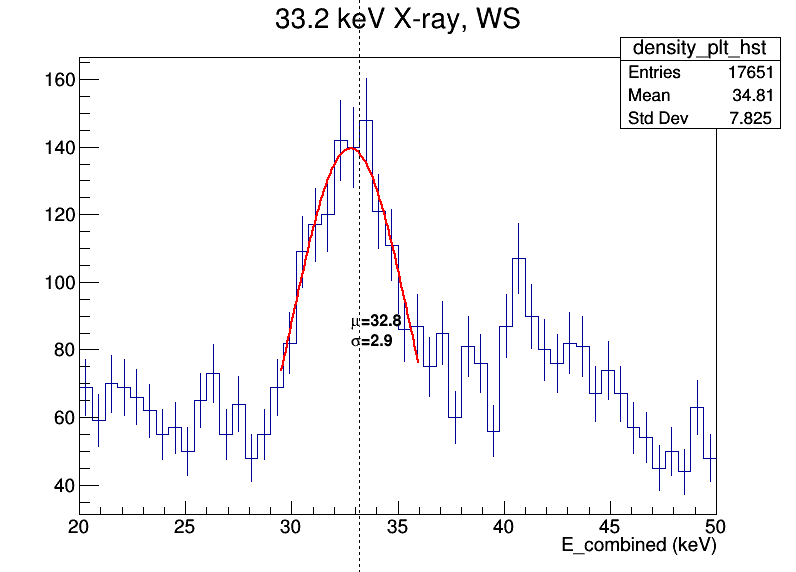

In [27]:
au = 3.1  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.7; # use 2.592 #90% 2.682 for 2 sigma
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))

fid_vol=TCut('drift>35 && drift<305 && correctedRadius<22 ') #add time cut ... 'luxstamp/10**15 ...&& luxstamp/10**15<8.5
area_cut=TCut('s1area>0 && s1area<1000 && s2area_raw>150 && s2area>200 && s2area<10**6') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
#ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
exclusion_cut=TCut('partner==0 && excluded==0 ')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + exclusion_cut.GetTitle());


density_plt_hst=TH1F('density_plt_hst','33.2 keV X-ray, WS;E_combined (keV)',50,20,50)
n=chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut+kr_time_cut_all) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[33.2] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,360))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

#Thresh=TLine(1.5,0,1.5,360)#energy threshold
#Thresh.SetLineColor(2)
#Thresh.Draw()

amps=[]
means=[]
means_err=[]
sigmas=[]
sigmas_err=[]
Texts=[]

density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
fitter = TVirtualFitter.GetFitter()
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
means_err.append(sqrt(fitter.GetCovarianceMatrixElement(1,1)))
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )
sigmas_err.append(sqrt(fitter.GetCovarianceMatrixElement(2,2)))

             
amps=array(amps)
means=array(means)
means_err=array(means_err)
sigmas=array(sigmas)
sigmas_err=array(sigmas_err)



for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.3g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
#density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
#density_plt_hst.Fit("gaus","+","",3.8,6.5);

gStyle.SetOptFit(0) # superimpose fit results

c2

<h1> Plots S2 vs. S1 </h1>

In [18]:
c3 = rootnotes.default_canvas(name='33keV')

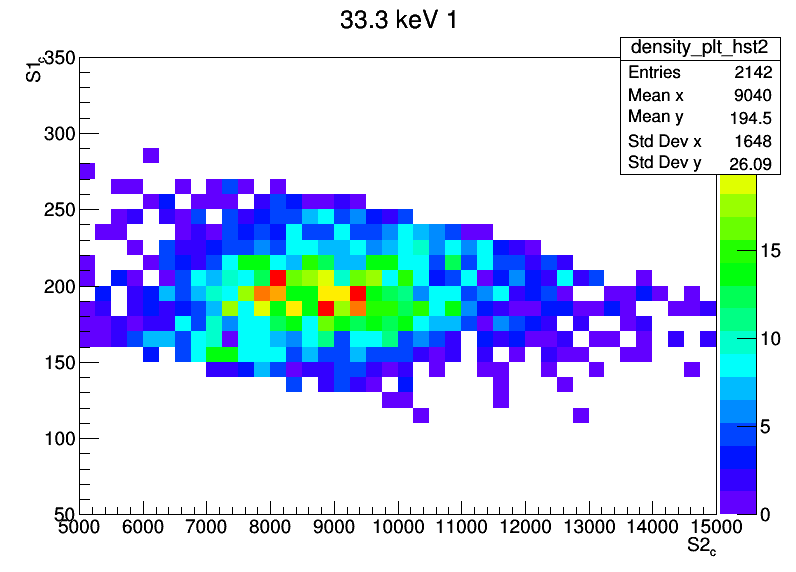

In [19]:
#chain.SetMarkerStyle(7)
#chain.SetMarkerSize(10)
#setup s2 vs s2 hist to get LY,QY
density_plt_hst2=TH2F('density_plt_hst2','33.3 keV 1;S2_{c};S1_{c}',40,5000,15000,30,50,350)
energy_cut=TCut('1/73*(s1area/{:g}+s2area/{:g})>{:g} && 1/73*(s1area/{:g}+s2area/{:g})<{:g}'
               .format(g1,g2,cutsE[0,0]-4,g1,g2,cutsE[0,1]+4))


n=chain.Draw('s1area:s2area>>density_plt_hst2',combined_cut+energy_cut+kr_time_cut_all,'colz') #s1area

c3

In [20]:
s1 = ndarray( (n,),dtype= float64, buffer=chain.GetV1())
s2 = ndarray( (n,),dtype= float64, buffer=chain.GetV2())


In [21]:
s1.size

2142

In [22]:
H, xedges, yedges = histogram2d(s2, s1, bins=20, range=None, normed=False)
H=H.T
x_bin_center=(xedges[:-1]+xedges[1:])/2
y_bin_center=(yedges[:-1]+yedges[1:])/2

initial_guess = (H.max(), mean(s2), mean(s1), std(s2), std(s1),0,0)
x, y = np.meshgrid(x_bin_center, y_bin_center)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), H.ravel(), p0=initial_guess)

mean_s2[0]=popt[1]
mean_s2_sig[0]=sqrt(pcov[1,1])
mean_s1[0]=popt[2]
mean_s1_sig[0]=sqrt(pcov[2,2])



In [23]:
savetxt('Run03_Golden_Doke/fits/33keVfit.txt', popt, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
savetxt('Run03_Golden_Doke/fits/33keVcov.txt', pcov, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')

(100, 300)

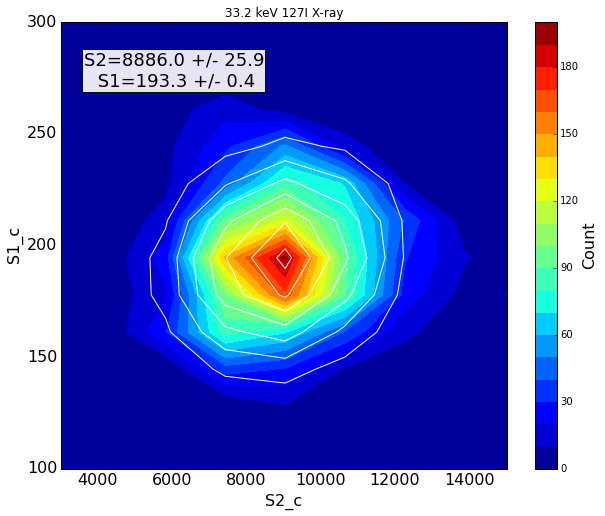

In [29]:
data_fitted = twoD_Gaussian((x, y), *popt)
figure
fig, ax = plt.subplots(1,1)
ax.hold(True)
#ax.imshow(H.reshape(x.shape), cmap=plt.cm.jet, origin='bottom',
#    extent=(x.min(), x.max(), y.min(), y.max()))
plt.contourf(x_bin_center,y_bin_center,H,20)
ax.contour(x, y, data_fitted.reshape(x.shape), 7, colors='w')
plt.xlabel('S2_c',fontsize=16)
plt.ylabel('S1_c',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb=plt.colorbar()
cb.set_label('Count',fontsize=16)
plt.text(x.min()*6,y.max()*.85,'S2={:1.1f} +/- {:1.1f} \n S1={:1.1f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.title('33.2 keV 127I X-ray')

plt.xlim([3000,15000])
plt.ylim([100,300])
#savefig('Run03_Golden_Doke/5keV_fit.pdf')

<h1> Check the R vs Z distribuation of the 2.8 keV events </h1>

In [27]:
#c4.Clear()
c4 = rootnotes.default_canvas(name='Ar_RZ')

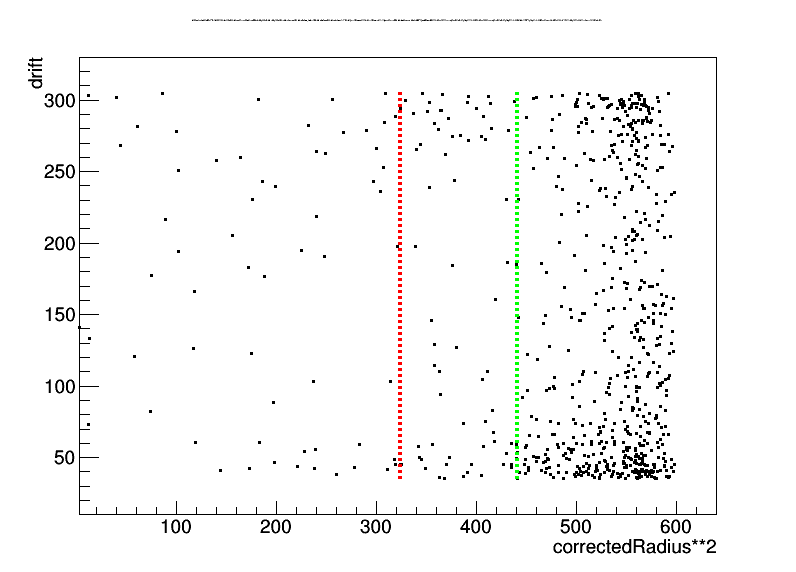

In [28]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('drift:correctedRadius**2',combined_cut+energy_cut) #s1area

linR18=TLine(18**2,35.5,18**2,305)
linR18.SetLineColor(2)
linR18.SetLineStyle(2)
linR18.SetLineWidth(4)
linR18.Draw()

linR21=TLine(21**2,35.5,21**2,305)
linR21.SetLineColor(3)
linR21.SetLineStyle(2)
linR21.SetLineWidth(4)
linR21.Draw()
c4

In [29]:
c5 = rootnotes.default_canvas(name='Ar_XY')

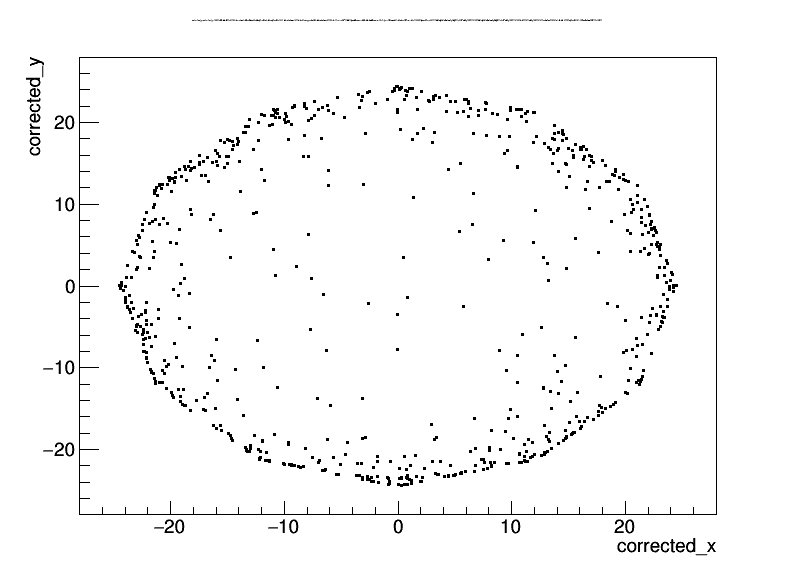

In [31]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('corrected_y:corrected_x',combined_cut+energy_cut) #s1area

c5

<h1> Make time histogram </h1>

In [28]:
c5 = rootnotes.default_canvas(name='time_hist')

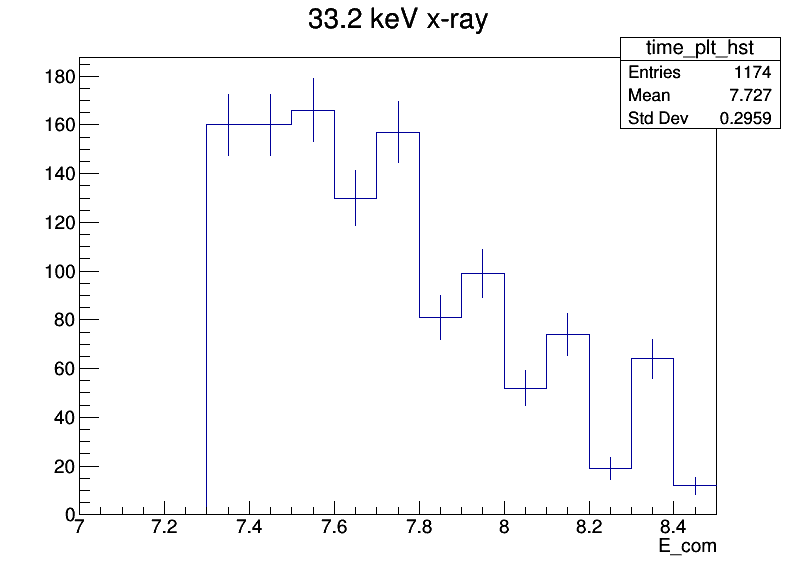

In [29]:
energy_cut=TCut('1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+'>30 &&1/73*(s1area/{:g}+s2area/{:g})'.format(g1,g2)+'<36' )

time_plt_hst=TH1F('time_plt_hst','33.2 keV x-ray;E_com',15,7,8.5)
n=chain.Draw('luxstamp/10**15>>time_plt_hst',combined_cut + kr_time_cut_all + energy_cut) # WS is chain2,
time_plt_hst.SetOption("EH")

c5

<h1> normalize to lifetime, and account for Kr data removal </h1>

In [52]:
#removing Kr livetime
time_diff=-1
kr_livetime_cut=ones(Run03Golden_lux_stamps.size,dtype=bool)
for ii in range(0,Run03Golden_lux_stamps.size):
    for jj in range(0,Kr_lux_stamps.size):
        time_diff=Run03Golden_lux_stamps[ii] - Kr_lux_stamps[jj]
        if aLib.inrange(time_diff,[0,16*3600*10**8]):
            kr_livetime_cut[ii]=0

In [57]:
livetime_in_bin.sum()

70.41458333333334

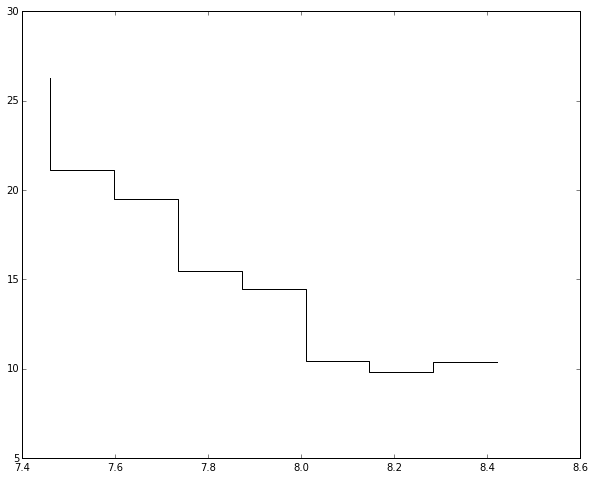

In [58]:
luxstamps = ndarray( (n,),dtype= float64, buffer=chain.GetV1())
luxstamps_hist, xedges = histogram(luxstamps,8) #linspace(7,8.5,10)
bin_center=(xedges[1:]+xedges[:-1])/2

livetime_in_bin=[]
for ii in range(0,luxstamps_hist.size):
    hist_cut=aLib.inrange(Run03Golden_lux_stamps/10**15,(xedges[ii],xedges[ii+1]))
    livetime_in_bin.append(Golden_Livetime_days[hist_cut&kr_livetime_cut].sum())

    
livetime_in_bin=array(livetime_in_bin)
plt.plot(xedges[1:],luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')

In [59]:
# convert luxstamp to date_num
lux_epoch=datestr2num('Jan 1st 2011 at 00:00')

luxstamp2day=bin_center*10**7/3600/24
luxstamp2day_edge_l=xedges[1:]*10**7/3600/24
luxstamp2day_edge_r=xedges[:-1]*10**7/3600/24

luxdatenum=luxstamp2day+lux_epoch
luxdatenum_edge_l=luxstamp2day_edge_l+lux_epoch
luxdatenum_edge_r=luxstamp2day_edge_r+lux_epoch

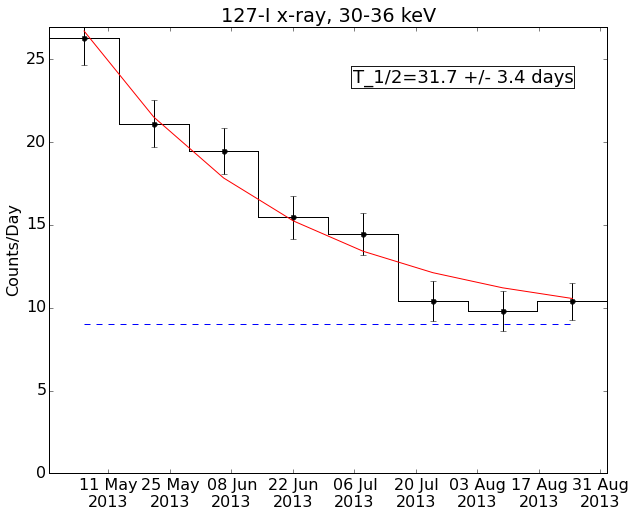

In [62]:
fit_start=datestr2num('May 1 2013 at 00:00')
fit_end=datestr2num('Sep 1 2013 at 00:00')
fit_offset=9
fit_range=(luxdatenum>fit_start) & (luxdatenum<fit_end)

popt, pcov = curve_fit(func, (luxdatenum[fit_range]-luxdatenum[0]), (luxstamps_hist[fit_range]/livetime_in_bin[fit_range])-fit_offset,p0=(20,20),maxfev = 5000)

plt.plot_date(luxdatenum_edge_l,luxstamps_hist/livetime_in_bin,'k',drawstyle='steps')
plt.step(luxdatenum_edge_r,luxstamps_hist/livetime_in_bin,'k',where='post')
plt.errorbar(luxdatenum,luxstamps_hist/livetime_in_bin,sqrt(luxstamps_hist)/livetime_in_bin,fmt=".k",markersize=10)
#plt.plot_date([file_dates,file_dates],[zeros(file_dates.size),70*ones(file_dates.size)],'--r')

plt.rcParams.update({'font.size': 16}) #increase all fontsizes
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))
plt.ylabel('Counts/Day')

plt.plot(luxdatenum, func((luxdatenum-luxdatenum[0]), *popt)+fit_offset, 'r-', label="Fitted Curve")
plt.text(luxdatenum.max(),luxstamps_hist.max()/livetime_in_bin.max(),'T_1/2={:1.1f} +/- {:1.1f} days'.format(popt[1]*log(2),sqrt(pcov[1,1])*log(2)),
         horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.ylim([0,luxstamps_hist.max()/livetime_in_bin.max()*1.1])

plt.plot([luxdatenum.min(),luxdatenum.max()],[fit_offset,fit_offset],'--b')

plt.title('127-I x-ray, 30-36 keV')